# Predicting Student Grades 

Objective: Predict final grades based on factors like study time, previous scores, 
and attendance.

The dats set used in this project is from the link " https://archive.ics.uci.edu/dataset/320/student+performance ".
Note: Only student-por.csv is used for the prediction of students(Portuguese).

1.	school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2.	sex - student's sex (binary: "F" - female or "M" - male)
3.	age - student's age (numeric: from 15 to 22)
4.	address - student's home address type (binary: "U" - urban or "R" - rural)
5.	famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6.	Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7.	Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8.	Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9.	Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") 
10.	Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11.	reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12.	guardian - student's guardian (nominal: "mother", "father" or "other")
13.	traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14.	studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15.	failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16.	schoolsup - extra educational support (binary: yes or no)
17.	famsup - family educational support (binary: yes or no)
18.	paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19.	activities - extra-curricular activities (binary: yes or no)
20.	nursery - attended nursery school (binary: yes or no)
21.	higher - wants to take higher education (binary: yes or no)
22.	internet - Internet access at home (binary: yes or no)
23.	romantic - with a romantic relationship (binary: yes or no)
24.	famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25.	freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26.	goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27.	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28.	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29.	health - current health status (numeric: from 1 - very bad to 5 - very good)
30.	absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math:
31.	G1 - first period grade (numeric: from 0 to 20)
32.	G2 - second period grade (numeric: from 0 to 20)
33.	G3 - final grade (numeric: from 0 to 20, output target)

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [116]:
df = pd.read_csv('student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [118]:
print(df.shape)

(649, 33)


In [120]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [121]:
# Let's check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Since there is no missing values. I have not used dropna here.

In [122]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [123]:
df.duplicated().sum()

np.int64(0)

In [124]:
df.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
df.to_csv('output_file.csv', index=False)

In [126]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [127]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [128]:
df.columns = df.columns.str.strip() #remove leading and trailing whitespaces

In [129]:
df["school"].value_counts()

school
GP    423
MS    226
Name: count, dtype: int64

In [130]:
df["sex"].value_counts()

sex
F    383
M    266
Name: count, dtype: int64

In [131]:
df["internet"].value_counts()

internet
yes    498
no     151
Name: count, dtype: int64

In [132]:
df["activities"].value_counts()

activities
no     334
yes    315
Name: count, dtype: int64

In [133]:
# Assuming your DataFrame is named df and has these columns
columns_of_interest = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
    'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]

# Apply value_counts() to each column
value_counts_results = {col: df[col].value_counts() for col in columns_of_interest}

# Print the results
for column, counts in value_counts_results.items():
    print(f"Value counts for {column}:\n{counts}\n")

Value counts for school:
school
GP    423
MS    226
Name: count, dtype: int64

Value counts for sex:
sex
F    383
M    266
Name: count, dtype: int64

Value counts for age:
age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64

Value counts for address:
address
U    452
R    197
Name: count, dtype: int64

Value counts for famsize:
famsize
GT3    457
LE3    192
Name: count, dtype: int64

Value counts for Pstatus:
Pstatus
T    569
A     80
Name: count, dtype: int64

Value counts for Medu:
Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64

Value counts for Fedu:
Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64

Value counts for Mjob:
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

Value counts for Fjob:
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

Value 

In [134]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Data cleaning process is up to here. Now, I am heading towards the outliers.

Filtered Data Shape After Outlier Removal:  (396, 33)


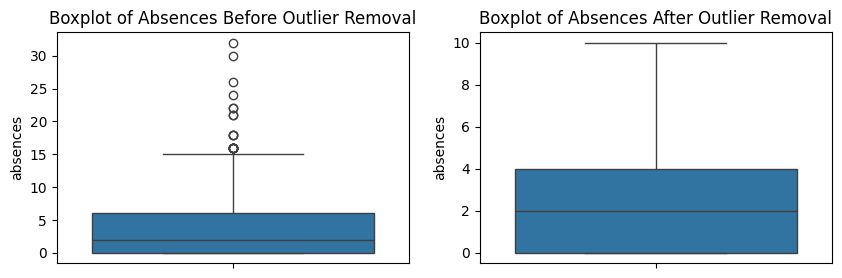

In [135]:
# 1. Removal of outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Only check numeric columns for outliers
numeric_columns_to_check = df.select_dtypes(include=[np.number]).columns.tolist()
filtered_df = df.copy()

for column in numeric_columns_to_check:
    filtered_df = remove_outliers(filtered_df, column)
    
print("Filtered Data Shape After Outlier Removal: ", filtered_df.shape)

# Visualization of box plot before and after outlier treatment
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["absences"])
plt.title('Boxplot of Absences Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["absences"])
plt.title('Boxplot of Absences After Outlier Removal')
plt.show()

Filtered Data Shape After Outlier Capping:  (649, 33)


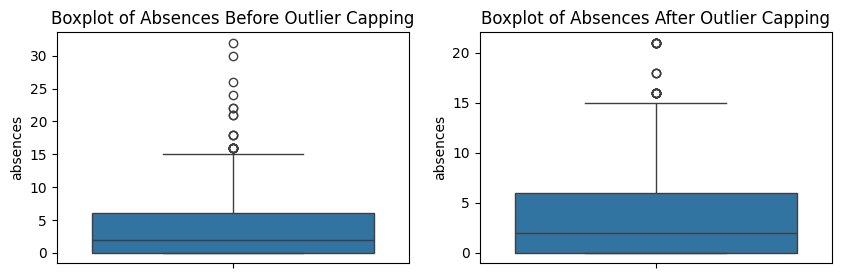

In [136]:
# 2. Capping of outliers
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Only check numeric columns for outliers
numeric_columns_to_check = df.select_dtypes(include=[np.number]).columns.tolist()
filtered_df = df.copy()

for column in numeric_columns_to_check:
    filtered_df = cap_outliers(filtered_df, column)
    
print("Filtered Data Shape After Outlier Capping: ", filtered_df.shape)
# Visualization of box plot before and after outlier treatment
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["absences"])
plt.title('Boxplot of Absences Before Outlier Capping')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["absences"])
plt.title('Boxplot of Absences After Outlier Capping')
plt.show()

### **Encoding Categorical Values**

In [137]:
categorical_variables = df.dtypes[df.dtypes == "object"].index
categorical_variables

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [138]:
for category in categorical_variables:
    print(f"Number of unique values in {category} = {len(df[category].unique())}")

Number of unique values in school = 2
Number of unique values in sex = 2
Number of unique values in address = 2
Number of unique values in famsize = 2
Number of unique values in Pstatus = 2
Number of unique values in Mjob = 5
Number of unique values in Fjob = 5
Number of unique values in reason = 4
Number of unique values in guardian = 3
Number of unique values in schoolsup = 2
Number of unique values in famsup = 2
Number of unique values in paid = 2
Number of unique values in activities = 2
Number of unique values in nursery = 2
Number of unique values in higher = 2
Number of unique values in internet = 2
Number of unique values in romantic = 2


Since all have not large number of distinct values, one-hot-encoding will not be efficient.

In [139]:
# Identify categorical variables
categorical_variables = df.dtypes[df.dtypes == "object"].index

# Apply one-hot encoding
encoded_df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

encoded_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,True,False,False,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,False,True,True,True,False
646,18,1,1,2,2,0,1,1,1,1,...,True,False,False,False,False,True,True,True,False,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False


# 1. Target Variable Analysis (Grades)

Grade Binning: 
Convert grades into categorical bins (e.g., Low, Medium, High) to analyze 
patterns in performance.

In [140]:
# Define grade bins
bins = [0, 9, 14, 20]  # Grade ranges
labels = ['Low', 'Medium', 'High']  # Categories

# Create a new column for grade categories
df['Grade_Category'] = pd.cut(df['G3'], bins=bins, labels=labels, include_lowest=True)

# Display value counts of each grade category
print(df['Grade_Category'].value_counts())

Grade_Category
Medium    418
High      131
Low       100
Name: count, dtype: int64


Grade Trends Over Age: Analyze how grades change with student age. Are younger students 
performing better or worse?

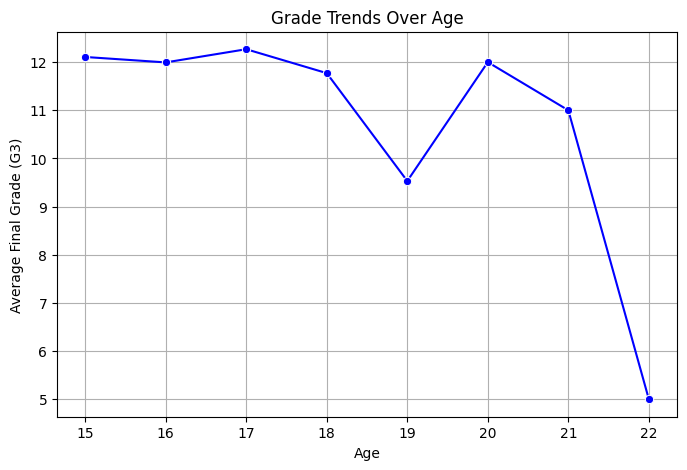

In [141]:
# Group by age and calculate the average G3 grade for each age group
age_trend = df.groupby('age')['G3'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(8, 5))
sns.lineplot(data=age_trend, x='age', y='G3', marker='o', color='b')
plt.xlabel('Age')
plt.ylabel('Average Final Grade (G3)')
plt.title('Grade Trends Over Age')
plt.grid(True)
plt.show()


The chart shows how the average final grade (G3) varies with age. Here's an interpretation of the trends:

1.Stable Performance (Ages 15-17)

Grades remain around 12-13, showing consistent performance.

2.Drop at Age 18-19

There’s a significant decline at age 19, possibly due to academic pressure, exams, or external factors.

3.Recovery at Age 20

The grades increase sharply at age 20, suggesting that some students improve over time.

4.Sharp Decline at Age 22

The lowest grades appear at age 22, likely because of a small sample size or students struggling with academics

# 2. Categorical Feature Analysis 

● Impact of Parental Education (medu, fedu) on Grades: 
○ Compare student grades across different levels of parental education. 
○ Investigate if students with highly educated parents perform significantly 
better. 

          Fedu         G1         G2         G3
Medu                                           
0     1.333333  10.833333  11.166667  11.666667
1     1.370629  10.398601  10.524476  10.797203
2     1.940860  11.204301  11.284946  11.661290
3     2.575540  11.323741  11.561151  11.920863
4     3.280000  12.502857  12.748571  13.068571
          Medu         G1         G2         G3
Fedu                                           
0     1.285714  11.428571  11.571429  12.142857
1     1.655172  10.522989  10.695402  10.936782
2     2.258373  11.368421  11.411483  11.784689
3     3.022901  11.732824  11.992366  12.381679
4     3.648438  12.296875  12.585938  12.921875


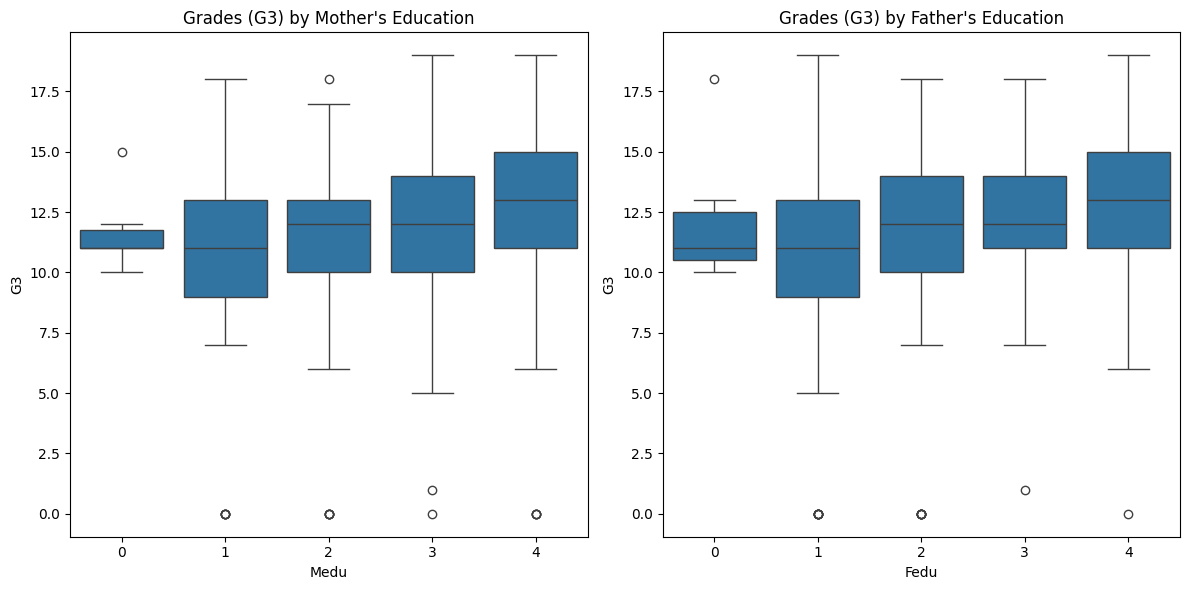

In [142]:
# Exploratory Data Analysis (EDA): Descriptive Statistics
print(df[['Medu', 'Fedu', 'G1', 'G2', 'G3']].groupby(['Medu']).mean())  # Average grades by mother's education
print(df[['Medu', 'Fedu', 'G1', 'G2', 'G3']].groupby(['Fedu']).mean())  # Average grades by father's education

# Visualizations: Boxplots of grades based on parental education
plt.figure(figsize=(12, 6))

# Boxplot for Mother's Education (Medu) vs Grades
plt.subplot(1, 2, 1)
sns.boxplot(x='Medu', y='G3', data=df)
plt.title('Grades (G3) by Mother\'s Education')

# Boxplot for Father's Education (Fedu) vs Grades
plt.subplot(1, 2, 2)
sns.boxplot(x='Fedu', y='G3', data=df)
plt.title('Grades (G3) by Father\'s Education')

plt.tight_layout()
plt.show()

The data indicates that higher levels of parental education are associated with better student grades, highlighting the importance of parental educational background in academic success.

● Effect of Parental Job (mjob, fjob) on Grades: 
○ Explore whether certain parental occupations (e.g., teacher, health) 
correlate with higher student performance. 

Mjob    0
Fjob    0
G1      0
G2      0
G3      0
dtype: int64
                 G1         G2         G3
Mjob                                     
at_home   10.451852  10.711111  11.044444
health    12.395833  12.645833  13.062500
other     11.275194  11.426357  11.670543
services  11.610294  11.720588  12.147059
teacher   12.555556  12.694444  13.138889
                 G1         G2         G3
Fjob                                     
at_home   10.404762  10.785714  11.428571
health    12.043478  12.260870  12.565217
other     11.362398  11.542234  11.891008
services  11.292818  11.370166  11.629834
teacher   13.055556  13.333333  13.583333


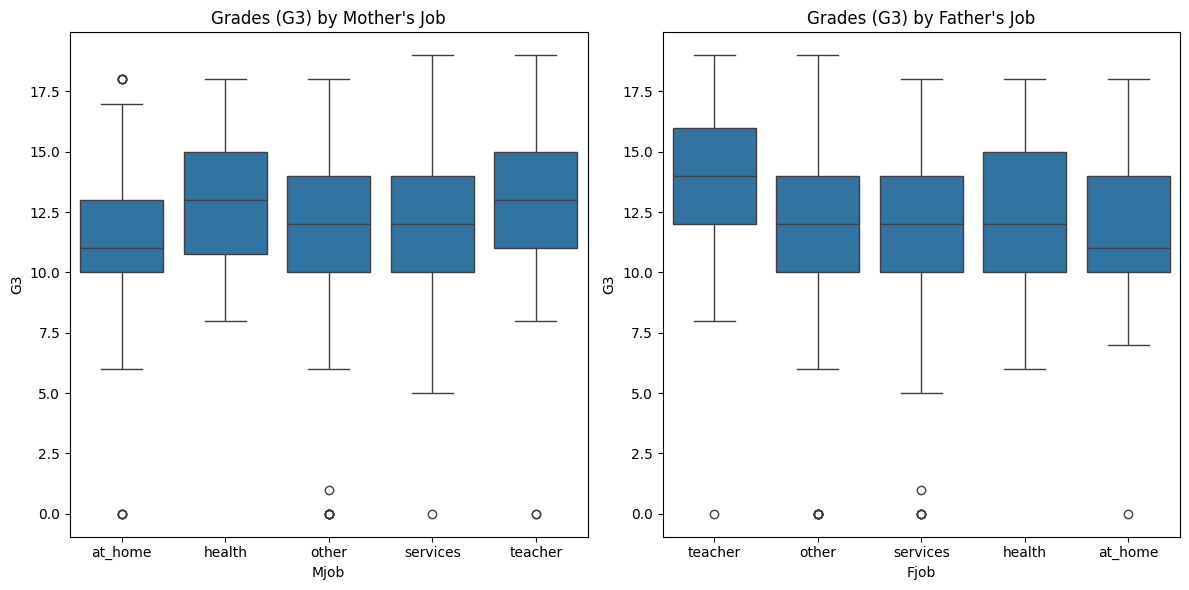

In [143]:
# Data Preprocessing: Check for missing values in the relevant columns
print(df[['Mjob', 'Fjob', 'G1', 'G2', 'G3']].isnull().sum())

# Drop rows with missing values in critical columns (optional, if needed)
df = df.dropna(subset=['Mjob', 'Fjob', 'G1', 'G2', 'G3'])

# Exploratory Data Analysis (EDA): Descriptive Statistics
print(df[['Mjob', 'G1', 'G2', 'G3']].groupby(['Mjob']).mean())  # Average grades by mother's job
print(df[['Fjob', 'G1', 'G2', 'G3']].groupby(['Fjob']).mean())  # Average grades by father's job

# Visualizations: Boxplots of grades based on parental jobs
plt.figure(figsize=(12, 6))

# Boxplot for Mother's Job (Mjob) vs Grades
plt.subplot(1, 2, 1)
sns.boxplot(x='Mjob', y='G3', data=df)
plt.title('Grades (G3) by Mother\'s Job')

# Boxplot for Father's Job (Fjob) vs Grades
plt.subplot(1, 2, 2)
sns.boxplot(x='Fjob', y='G3', data=df)
plt.title('Grades (G3) by Father\'s Job')

plt.tight_layout()
plt.show()

● Guardian Influence (guardian): 
○ Analyze if students living with different guardians (mother, father, others) 
have varying academic performance

                 G1         G2         G3
guardian                                 
father    11.784314  11.875817  12.202614
mother    11.389011  11.573626  11.896703
other     10.073171  10.390244  10.902439


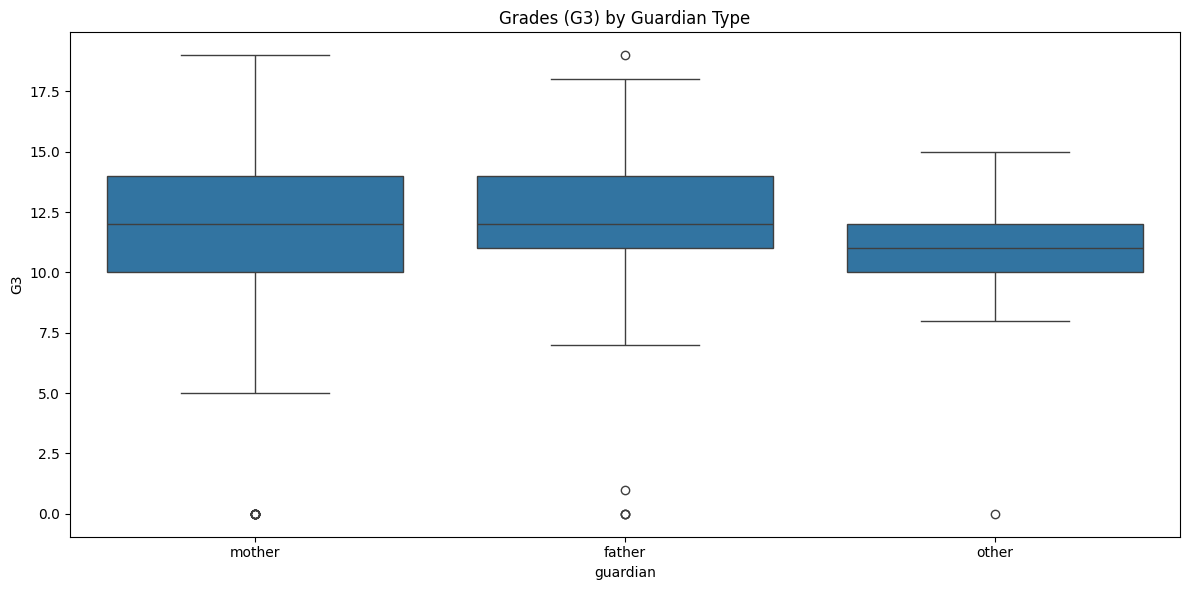

In [144]:
# Exploratory Data Analysis (EDA): Descriptive Statistics
print(df[['guardian', 'G1', 'G2', 'G3']].groupby(['guardian']).mean())  # Average grades by guardian

# Visualizations: Boxplots of grades based on guardian type
plt.figure(figsize=(12, 6))

# Boxplot for Guardian vs Grades (G3)
sns.boxplot(x='guardian', y='G3', data=df)
plt.title('Grades (G3) by Guardian Type')

plt.tight_layout()
plt.show()

● Family Size (famsize) and Academic Performance: 
○ Examine whether students from larger families (e.g., famsize = GT3) 
perform differently from those with smaller families. 

                G1         G2         G3
famsize                                 
GT3      11.315098  11.496718  11.811816
LE3      11.598958  11.744792  12.130208


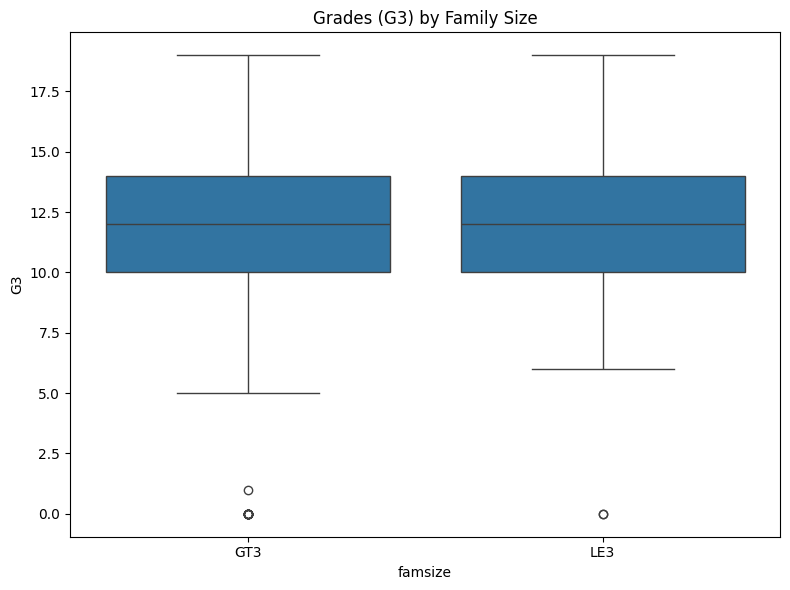

In [145]:
# Exploratory Data Analysis (EDA): Descriptive Statistics
print(df[['famsize', 'G1', 'G2', 'G3']].groupby(['famsize']).mean())  # Average grades by family size

# Visualizations: Boxplots of grades based on family size
plt.figure(figsize=(8, 6))

# Boxplot for Family Size (famsize) vs Grades (G3)
sns.boxplot(x='famsize', y='G3', data=df)
plt.title('Grades (G3) by Family Size')

plt.tight_layout()
plt.show()

● Living Conditions (address) and Grades: 
○ Compare student performance in urban (U) vs. rural (R) settings. 

                G1         G2         G3
address                                 
R        10.746193  10.888325  11.086294
U        11.683628  11.867257  12.263274


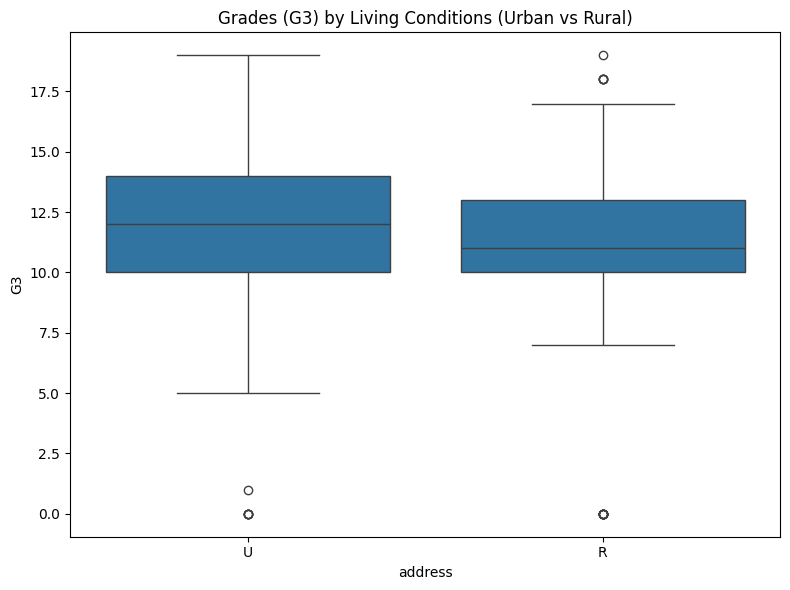

In [146]:
# Exploratory Data Analysis (EDA): Descriptive Statistics
print(df[['address', 'G1', 'G2', 'G3']].groupby(['address']).mean())  # Average grades by address

# Visualizations: Boxplots of grades based on address (urban vs. rural)
plt.figure(figsize=(8, 6))

# Boxplot for Address (Urban vs Rural) vs Grades (G3)
sns.boxplot(x='address', y='G3', data=df)
plt.title('Grades (G3) by Living Conditions (Urban vs Rural)')

plt.tight_layout()
plt.show()


● Effect of Support Systems (schoolsup, famsup): 
○ Compare grades for students who receive school and family support vs. 
those who don’t. 

                  G1         G2         G3
schoolsup                                 
no         11.466437  11.626506  11.979346
yes        10.823529  11.088235  11.279412
               G1         G2         G3
famsup                                 
no      11.266932  11.430279  11.665339
yes     11.482412  11.658291  12.057789


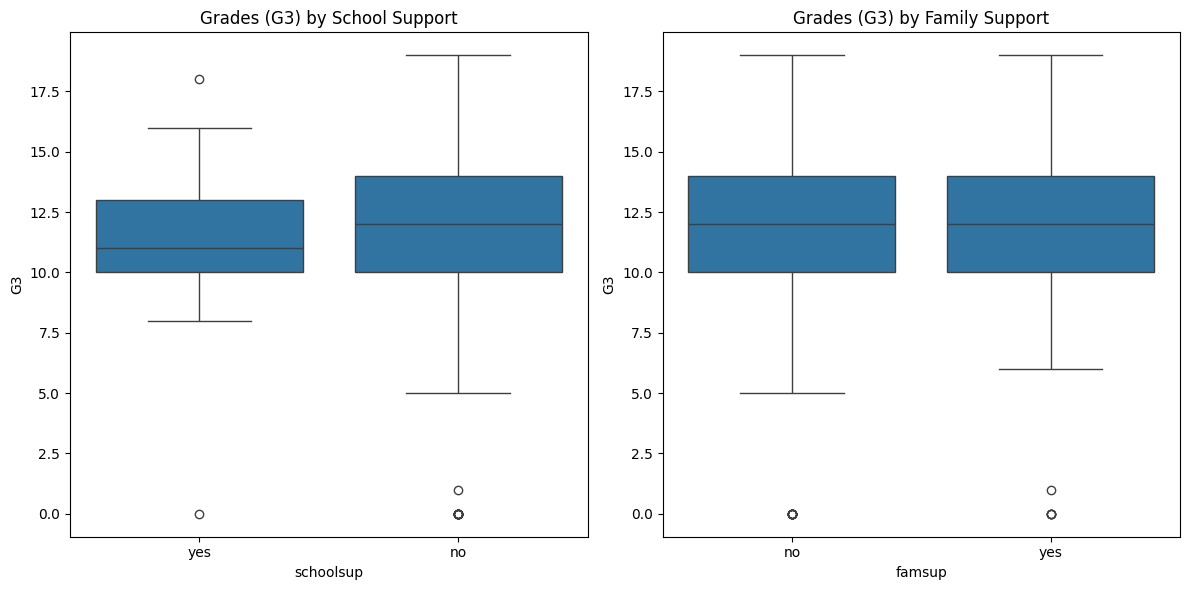

In [147]:
# Average grades for students receiving school support (schoolsup) and family support (famsup)
print(df[['schoolsup', 'G1', 'G2', 'G3']].groupby(['schoolsup']).mean())  # Average grades by school support
print(df[['famsup', 'G1', 'G2', 'G3']].groupby(['famsup']).mean())  # Average grades by family support

# Visualizations: Boxplots of grades based on school and family support
plt.figure(figsize=(12, 6))

# Boxplot for School Support (schoolsup) vs Grades (G3)
plt.subplot(1, 2, 1)
sns.boxplot(x='schoolsup', y='G3', data=df)
plt.title('Grades (G3) by School Support')

# Boxplot for Family Support (famsup) vs Grades (G3)
plt.subplot(1, 2, 2)
sns.boxplot(x='famsup', y='G3', data=df)
plt.title('Grades (G3) by Family Support')

plt.tight_layout()
plt.show()

# 3. Study & Lifestyle Factors 

● Effect of Travel Time (traveltime) on Grades: 
○ Investigate if students who travel longer distances to school tend to score 
lower. 

                   G1         G2         G3
traveltime                                 
1           11.759563  11.907104  12.251366
2           11.046948  11.309859  11.577465
3           10.648148  10.814815  11.166667
4           10.375000   9.875000  10.875000


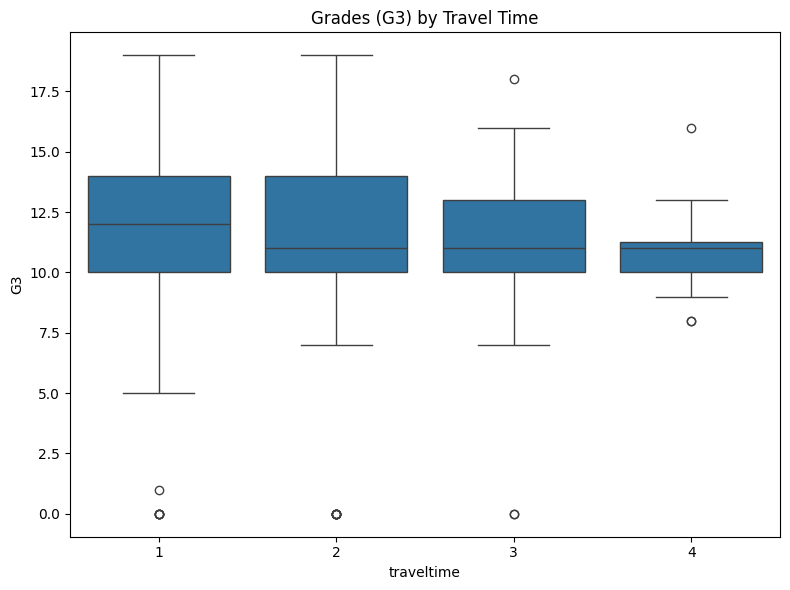

In [148]:
# Exploratory Data Analysis (EDA): Descriptive Statistics
print(df[['traveltime', 'G1', 'G2', 'G3']].groupby(['traveltime']).mean())  # Average grades by travel time

# Visualizations: Boxplots of grades based on travel time
plt.figure(figsize=(8, 6))

# Boxplot for Travel Time vs Grades (G3)
sns.boxplot(x='traveltime', y='G3', data=df)
plt.title('Grades (G3) by Travel Time')

plt.tight_layout()
plt.show()

● Study Time (studytime) vs. Performance: 
○ Check if more study time leads to significantly better grades or if there is a 
saturation point. 
○ Explore interaction effects (e.g., does study time have more impact for 
students with lower parental education?). 

                  G1         G2         G3
studytime                                 
1          10.504717  10.702830  10.844340
2          11.537705  11.662295  12.091803
3          12.422680  12.793814  13.226804
4          12.771429  12.628571  13.057143


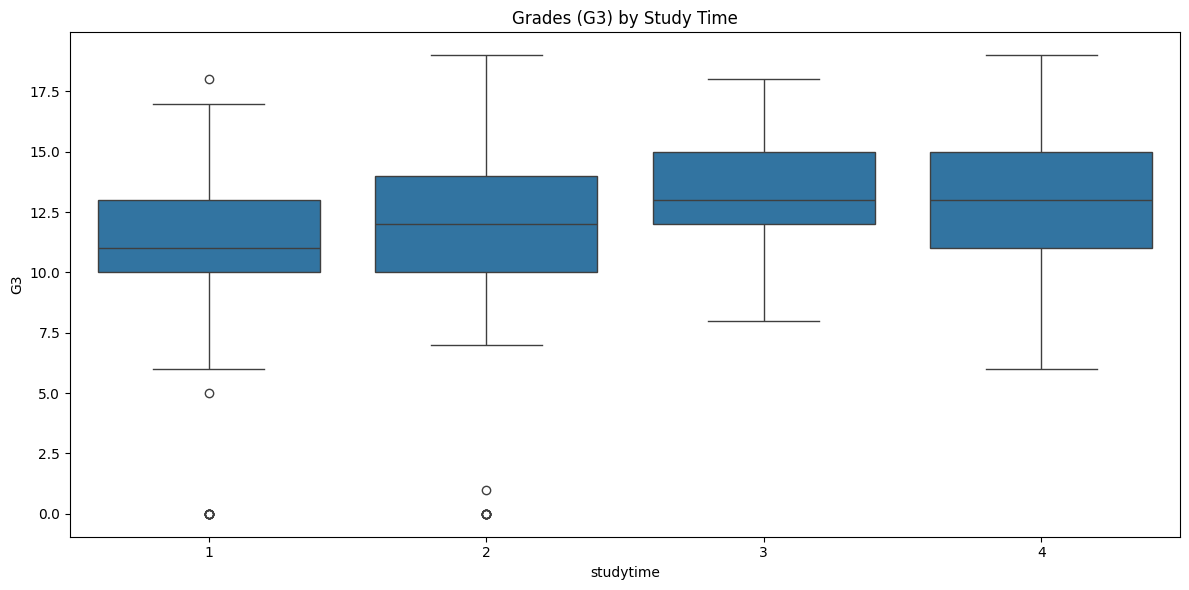

In [149]:
# Average grades based on study time
print(df[['studytime', 'G1', 'G2', 'G3']].groupby(['studytime']).mean())  # Average grades by studytime

# Visualizations: Boxplots of grades based on study time
plt.figure(figsize=(12, 6))

# Boxplot for Study Time vs Grades (G3)
sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Grades (G3) by Study Time')

plt.tight_layout()
plt.show()

● Extracurricular Activities (activities) vs. Grades: 
○ Analyze whether students involved in extracurricular activities perform 
better or worse academically. 

                   G1         G2         G3
activities                                 
no          11.185629  11.380240  11.718563
yes         11.625397  11.771429  12.104762


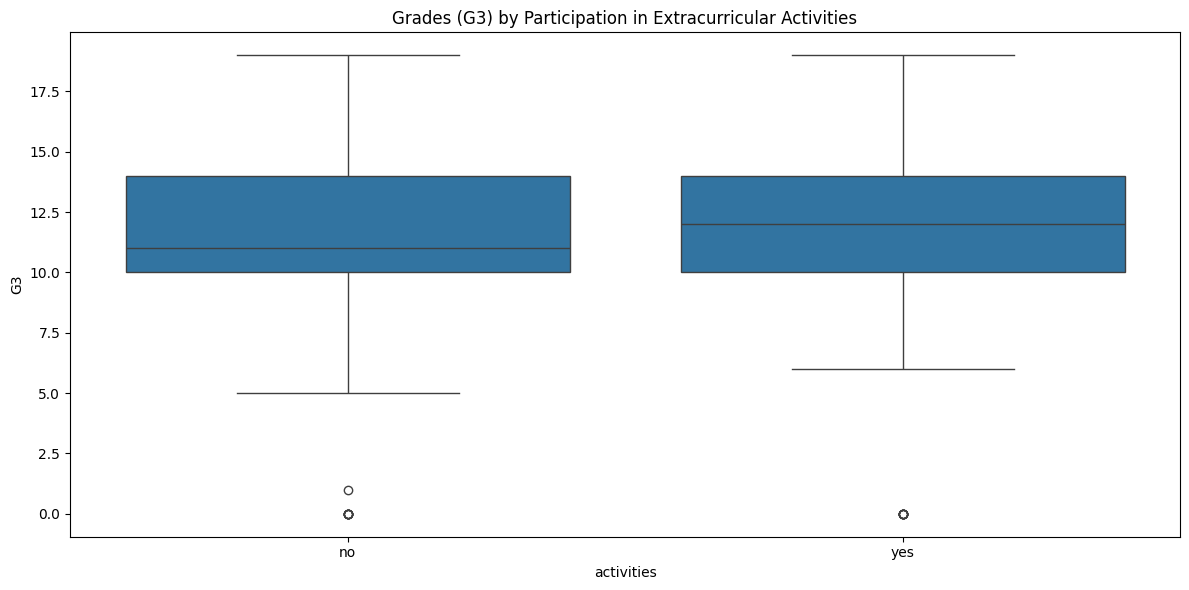

In [150]:
# Average grades based on participation in extracurricular activities
print(df[['activities', 'G1', 'G2', 'G3']].groupby(['activities']).mean())  # Average grades by activities participation

# Visualizations: Boxplots of grades based on activities participation
plt.figure(figsize=(12, 6))

# Boxplot for Activities vs Grades (G3)
sns.boxplot(x='activities', y='G3', data=df)
plt.title('Grades (G3) by Participation in Extracurricular Activities')

plt.tight_layout()
plt.show()

● Paid Tutoring (paid) and Its Impact on Grades: 
○ Compare performance between students who receive paid tutoring and 
those who don’t. 

             G1         G2         G3
paid                                 
no    11.442623  11.595082  11.950820
yes   10.717949  11.179487  11.205128


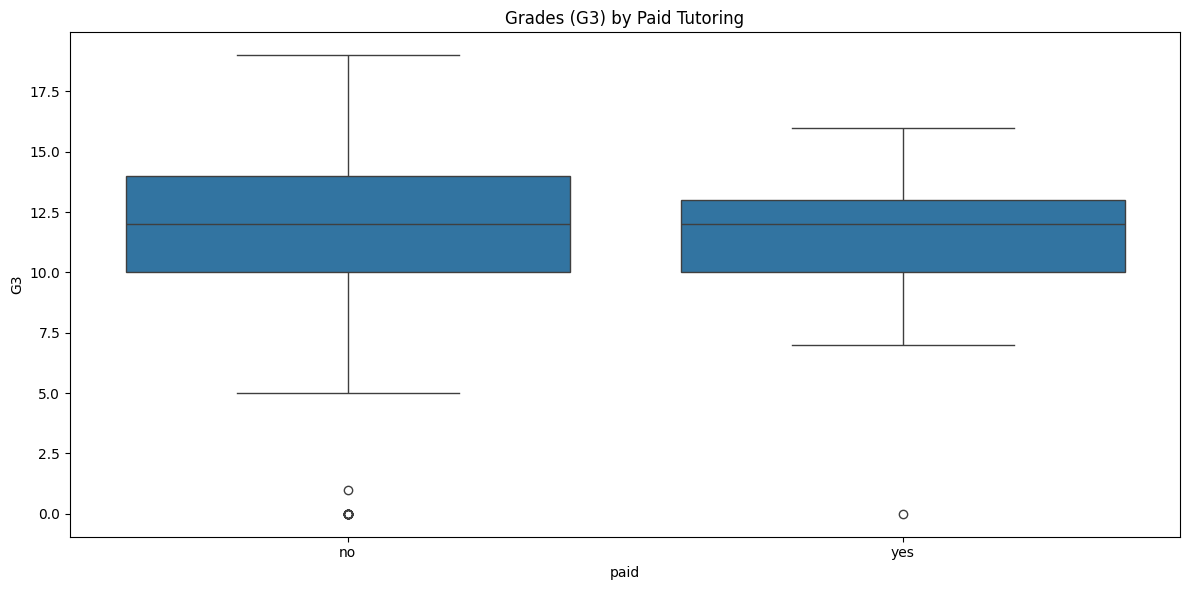

In [151]:
# Average grades based on paid tutoring
print(df[['paid', 'G1', 'G2', 'G3']].groupby(['paid']).mean())  # Average grades by paid tutoring

# Visualizations: Boxplots of grades based on paid tutoring
plt.figure(figsize=(12, 6))

# Boxplot for Paid Tutoring vs Grades (G3)
sns.boxplot(x='paid', y='G3', data=df)
plt.title('Grades (G3) by Paid Tutoring')

plt.tight_layout()
plt.show()

# 4. Academic Performance & Failures 

● Impact of Previous Failures (failures) on Future Grades: 
○ Check if students who failed previously tend to continue underperforming. 

                 G1         G2         G3
failures                                 
0         11.888889  12.102004  12.510018
1          8.900000   8.700000   8.642857
2          8.187500   8.937500   8.812500
3          8.357143   8.071429   8.071429


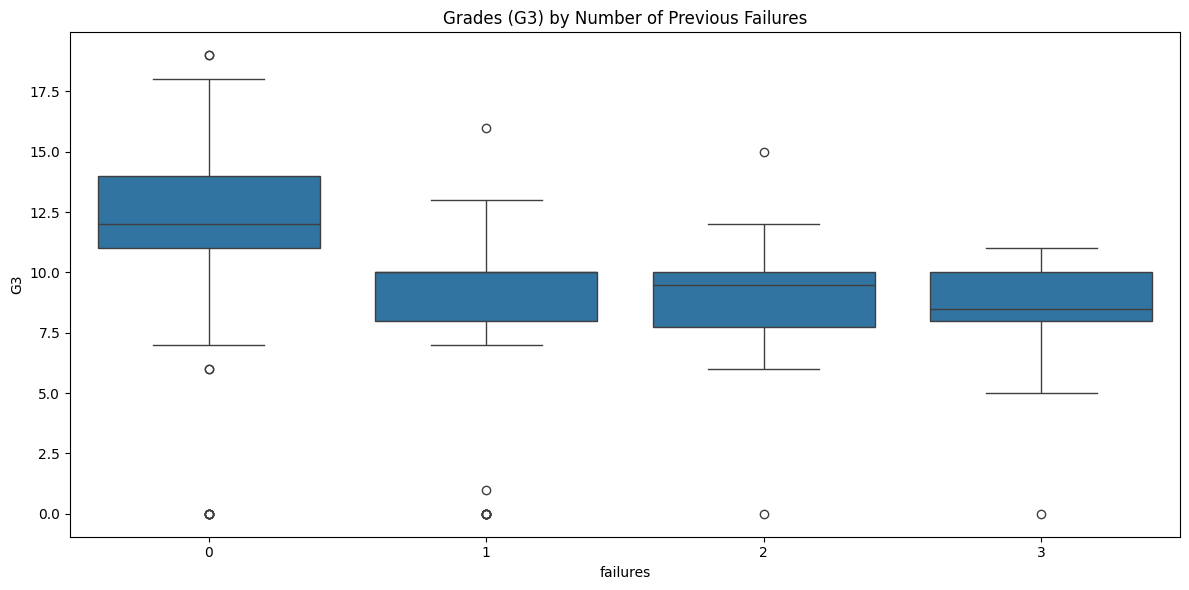

In [152]:
# Average grades based on number of previous failures
print(df[['failures', 'G1', 'G2', 'G3']].groupby(['failures']).mean())

# Visualizations: Boxplots of grades based on previous failures
plt.figure(figsize=(12, 6))

# Boxplot for Failures vs Grades (G3)
sns.boxplot(x='failures', y='G3', data=df)
plt.title('Grades (G3) by Number of Previous Failures')

plt.tight_layout()
plt.show()

● Multiple Failures Analysis: 
○ Determine the threshold at which failures become a significant predictor of 
poor grades. 

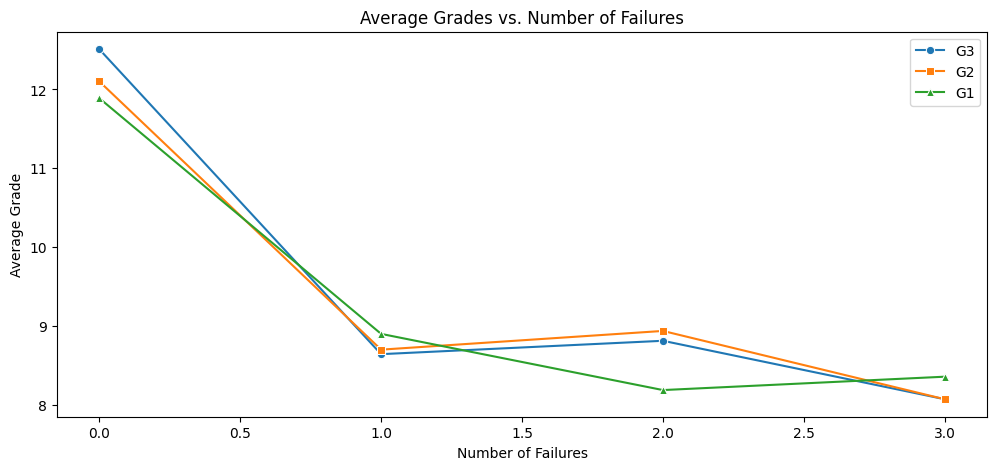

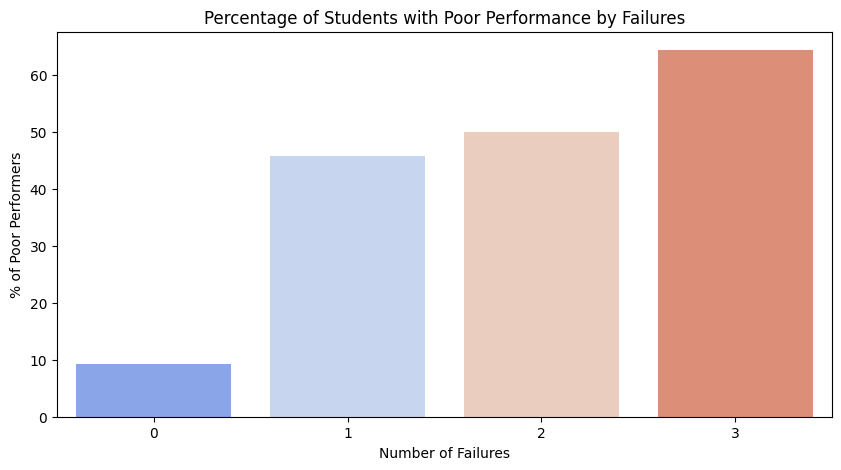

ANOVA Result for G3: F-statistic = 51.38582794045558, p-value = 8.644516356430469e-30


In [153]:
# Define a performance threshold (e.g., G3 < 10 is considered poor)
df['poor_performance'] = (df['G3'] < 10).astype(int)

# Group data by number of failures and calculate average grades
failures_avg = df.groupby('failures')[['G1', 'G2', 'G3']].mean()
poor_performance_rate = df.groupby('failures')['poor_performance'].mean() * 100  # Convert to percentage

# Plot: Trend of grades vs. failures
plt.figure(figsize=(12, 5))
sns.lineplot(x=failures_avg.index, y=failures_avg['G3'], marker='o', label="G3")
sns.lineplot(x=failures_avg.index, y=failures_avg['G2'], marker='s', label="G2")
sns.lineplot(x=failures_avg.index, y=failures_avg['G1'], marker='^', label="G1")
plt.title('Average Grades vs. Number of Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Average Grade')
plt.legend()
plt.show()

# Plot: Percentage of poor performers at each failure level
plt.figure(figsize=(10, 5))
sns.barplot(x=poor_performance_rate.index, y=poor_performance_rate.values, palette="coolwarm")
plt.title('Percentage of Students with Poor Performance by Failures')
plt.xlabel('Number of Failures')
plt.ylabel('% of Poor Performers')
plt.show()

# Hypothesis Testing: ANOVA for failures vs grades
anova_g3 = stats.f_oneway(df[df['failures'] == 0]['G3'], 
                          df[df['failures'] == 1]['G3'], 
                          df[df['failures'] == 2]['G3'], 
                          df[df['failures'] >= 3]['G3'])

print(f"ANOVA Result for G3: F-statistic = {anova_g3.statistic}, p-value = {anova_g3.pvalue}")

● Interaction Between Failures & Support Systems: 
○ Check if students with academic failures benefit more from school or family 
support.

<Figure size 1200x500 with 0 Axes>

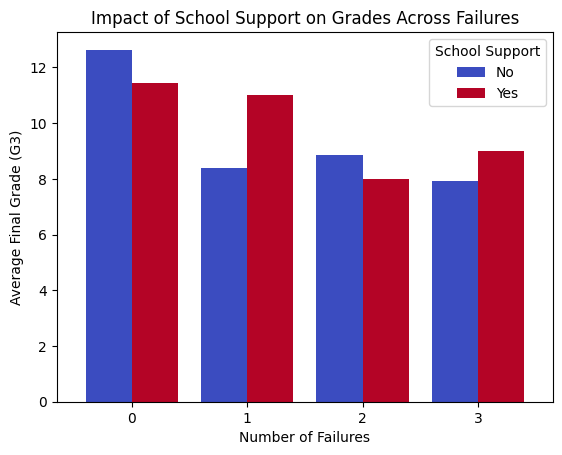

<Figure size 1200x500 with 0 Axes>

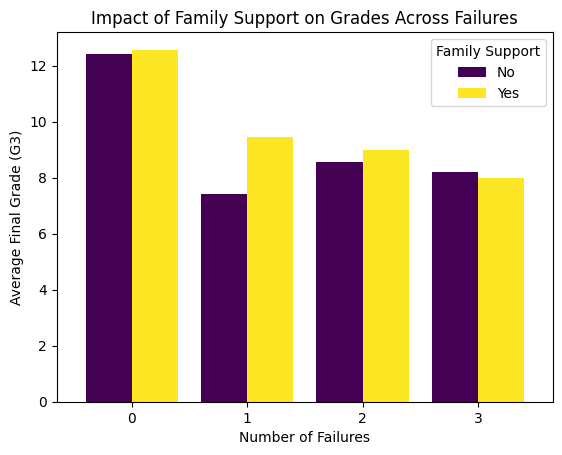

ANOVA for Failures & School Support: F-statistic = 3.044869465429855, p-value = 0.08412735539574918
ANOVA for Failures & Family Support: F-statistic = 4.7538303200239875, p-value = 0.031627082726049846


In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming the dataset is loaded into a pandas DataFrame called df
# df = pd.read_csv('your_dataset.csv')  

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['failures', 'G3', 'schoolsup', 'famsup'])

# Convert categorical support columns to numerical (Yes=1, No=0)
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})

# Group data by failures and support status to calculate average G3
failures_schoolsup = df.groupby(['failures', 'schoolsup'])['G3'].mean().unstack()
failures_famsup = df.groupby(['failures', 'famsup'])['G3'].mean().unstack()

# Plot: Interaction of Failures & School Support
plt.figure(figsize=(12, 5))
failures_schoolsup.plot(kind='bar', colormap='coolwarm', width=0.8)
plt.title('Impact of School Support on Grades Across Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.legend(title="School Support", labels=["No", "Yes"])
plt.show()

# Plot: Interaction of Failures & Family Support
plt.figure(figsize=(12, 5))
failures_famsup.plot(kind='bar', colormap='viridis', width=0.8)
plt.title('Impact of Family Support on Grades Across Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.legend(title="Family Support", labels=["No", "Yes"])
plt.show()

# Statistical Test: ANOVA for Interaction Effects
anova_schoolsup = stats.f_oneway(df[(df['failures'] >= 1) & (df['schoolsup'] == 1)]['G3'],
                                 df[(df['failures'] >= 1) & (df['schoolsup'] == 0)]['G3'])

anova_famsup = stats.f_oneway(df[(df['failures'] >= 1) & (df['famsup'] == 1)]['G3'],
                              df[(df['failures'] >= 1) & (df['famsup'] == 0)]['G3'])

print(f"ANOVA for Failures & School Support: F-statistic = {anova_schoolsup.statistic}, p-value = {anova_schoolsup.pvalue}")
print(f"ANOVA for Failures & Family Support: F-statistic = {anova_famsup.statistic}, p-value = {anova_famsup.pvalue}")

# 5. Feature Interactions 

● Parental Education x Study Time: 
○ Explore whether students with highly educated parents benefit more from 
study time. 

<Figure size 1000x500 with 0 Axes>

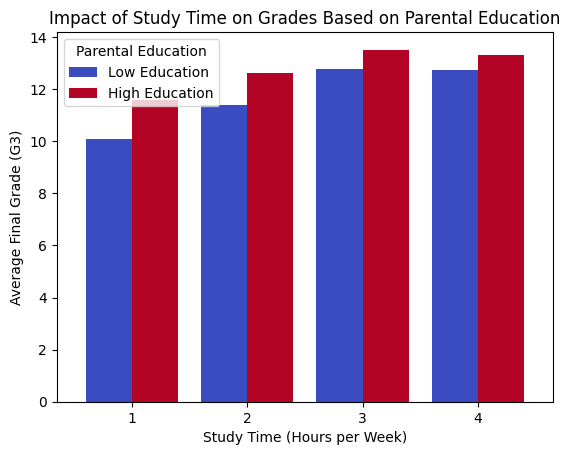

In [156]:
# Define "highly educated parents" (education level ≥ 3)
df['high_Medu'] = (df['Medu'] >= 3).astype(int)
df['high_Fedu'] = (df['Fedu'] >= 3).astype(int)

# Create an overall parental education category (1 if either parent is highly educated)
df['high_ParentalEdu'] = ((df['Medu'] >= 3) | (df['Fedu'] >= 3)).astype(int)

# Group data by study time and parental education level to get average G3
studytime_edu = df.groupby(['studytime', 'high_ParentalEdu'])['G3'].mean().unstack()

# Plot: Interaction of Study Time & Parental Education on Grades
plt.figure(figsize=(10, 5))
studytime_edu.plot(kind='bar', colormap='coolwarm', width=0.8)
plt.title('Impact of Study Time on Grades Based on Parental Education')
plt.xlabel('Study Time (Hours per Week)')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.legend(title="Parental Education", labels=["Low Education", "High Education"])
plt.show()


● Address x Study Time: 
○ Compare if urban vs. rural students need more study time to achieve 
similar grades. 

<Figure size 1000x500 with 0 Axes>

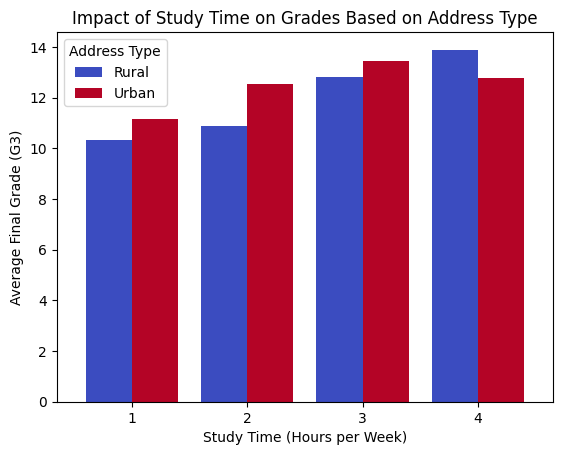

In [157]:
# Convert address to numerical (Urban = 1, Rural = 0)
df['urban'] = df['address'].map({'U': 1, 'R': 0})

# Group data by study time and address type to calculate average G3
studytime_address = df.groupby(['studytime', 'urban'])['G3'].mean().unstack()

# Plot: Impact of Study Time on Grades Based on Address Type
plt.figure(figsize=(10, 5))
studytime_address.plot(kind='bar', colormap='coolwarm', width=0.8)
plt.title('Impact of Study Time on Grades Based on Address Type')
plt.xlabel('Study Time (Hours per Week)')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.legend(title="Address Type", labels=["Rural", "Urban"])
plt.show()

● Gender (sex) x Academic Performance: 
○ Investigate gender differences in student grades. 
○ Check if gender interacts with other factors like parental education or study 
time. 

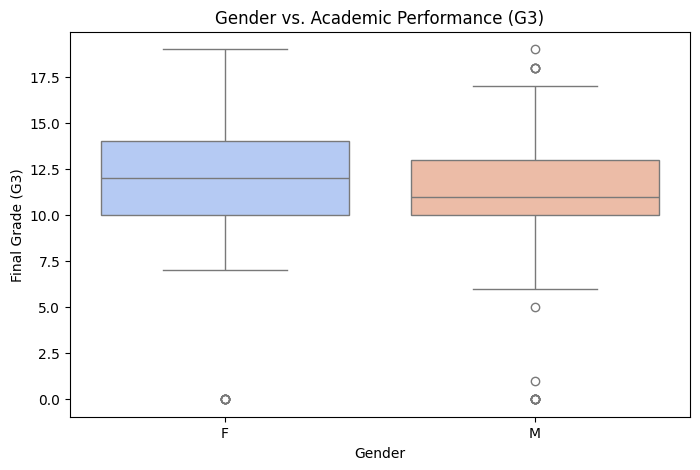

T-Test for Gender and G3: t-statistic = 3.310937693029702, p-value = 0.000981528706137396


<Figure size 1000x500 with 0 Axes>

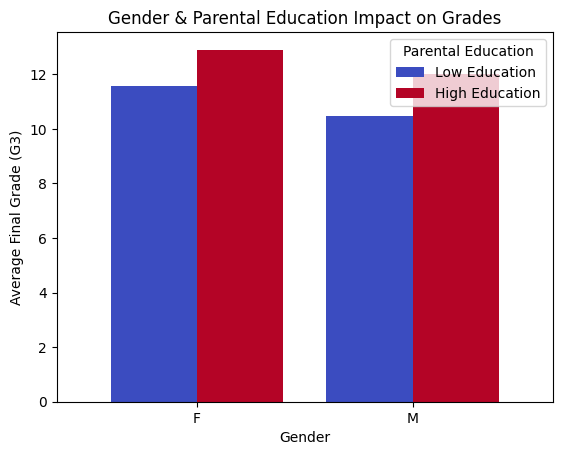

<Figure size 1000x500 with 0 Axes>

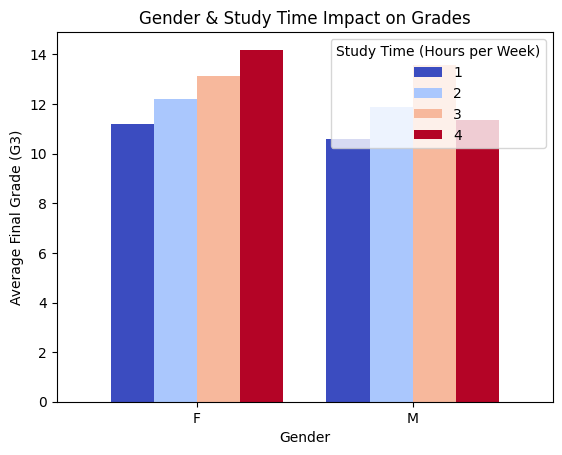

In [158]:
# Convert gender to numerical (Male = 0, Female = 1)
df['sex_numeric'] = df['sex'].map({'M': 0, 'F': 1})

# 1. Gender and Academic Performance
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['sex'], y=df['G3'], palette='coolwarm')
plt.title('Gender vs. Academic Performance (G3)')
plt.xlabel('Gender')
plt.ylabel('Final Grade (G3)')
plt.show()

# Perform t-test to check if the mean G3 differs by gender
t_test_gender = stats.ttest_ind(df[df['sex_numeric'] == 1]['G3'], df[df['sex_numeric'] == 0]['G3'])
print(f"T-Test for Gender and G3: t-statistic = {t_test_gender.statistic}, p-value = {t_test_gender.pvalue}")

# 2. Interaction: Gender x Parental Education x Performance
df['high_ParentalEdu'] = ((df['Medu'] >= 3) | (df['Fedu'] >= 3)).astype(int)
gender_parentedu = df.groupby(['sex', 'high_ParentalEdu'])['G3'].mean().unstack()

plt.figure(figsize=(10, 5))
gender_parentedu.plot(kind='bar', colormap='coolwarm', width=0.8)
plt.title('Gender & Parental Education Impact on Grades')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.legend(title="Parental Education", labels=["Low Education", "High Education"])
plt.show()

# 3. Interaction: Gender x Study Time x Performance
gender_studytime = df.groupby(['sex', 'studytime'])['G3'].mean().unstack()

plt.figure(figsize=(10, 5))
gender_studytime.plot(kind='bar', colormap='coolwarm', width=0.8)
plt.title('Gender & Study Time Impact on Grades')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.legend(title="Study Time (Hours per Week)")
plt.show()

● Family Support x Study Time: 
○ Analyze whether family support makes up for limited study time. 

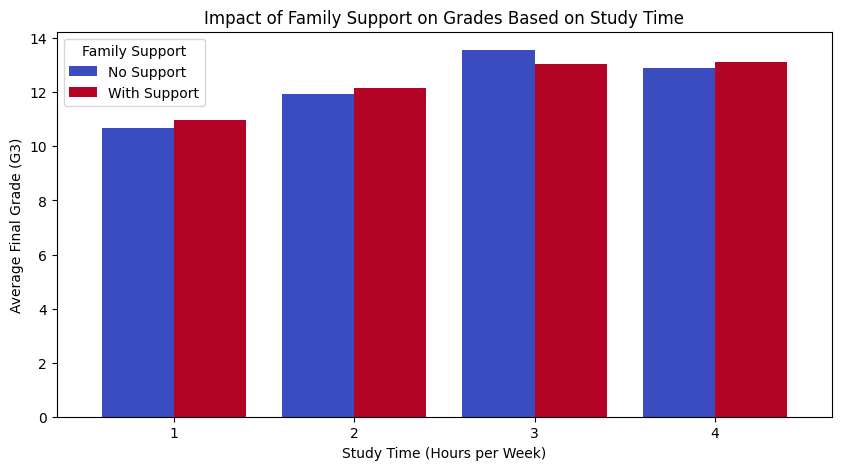

In [159]:
# Convert famsup column to categorical
df['famsup'] = df['famsup'].astype('category')

# Ensure 'studytime' and 'G3' are numeric
df['studytime'] = pd.to_numeric(df['studytime'], errors='coerce')
df['G3'] = pd.to_numeric(df['G3'], errors='coerce')
# Check if df_cleaned is empty
if df_cleaned.empty:
    print("The cleaned DataFrame is empty. Please check your data and try again.")
else:
    # Group by 'studytime' and 'famsup', then calculate the average final grade (G3)
    studytime_famsup = df_cleaned.groupby(['studytime', 'famsup'])['G3'].mean().unstack()

    # Ensure studytime is sorted in ascending order
    studytime_famsup = studytime_famsup.sort_index()

    # Plot the data
    studytime_famsup.plot(kind='bar', colormap='coolwarm', width=0.8, figsize=(10, 5))

    # Customize the plot
    plt.title('Impact of Family Support on Grades Based on Study Time')
    plt.xlabel('Study Time (Hours per Week)')
    plt.ylabel('Average Final Grade (G3)')
    plt.xticks(rotation=0)  # Rotate x-axis labels to make them readable
    plt.legend(title="Family Support", labels=["No Support", "With Support"])

    # Show the plot
    plt.show()


In [160]:
df['famsup'].unique()


[0, 1]
Categories (2, int64): [0, 1]

## 6. Feature Engineering

● New Features Based on Insights: 
○ Create interaction features (e.g., medu x studytime, failures x 
schoolsup). 
○ Convert numerical features into categorical bins (e.g., studytime into 
"low", "medium", "high").

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... Grade_Category poor_performance  high_Medu

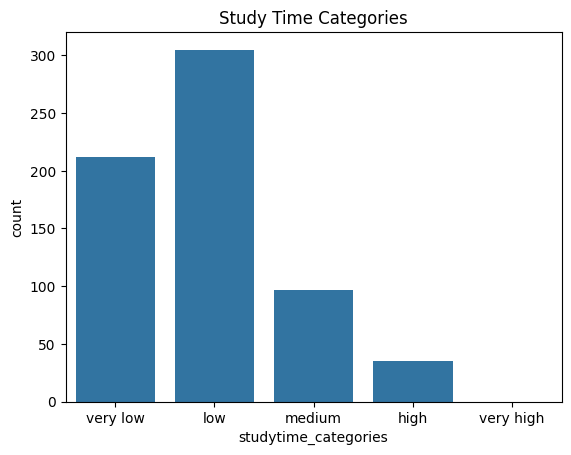

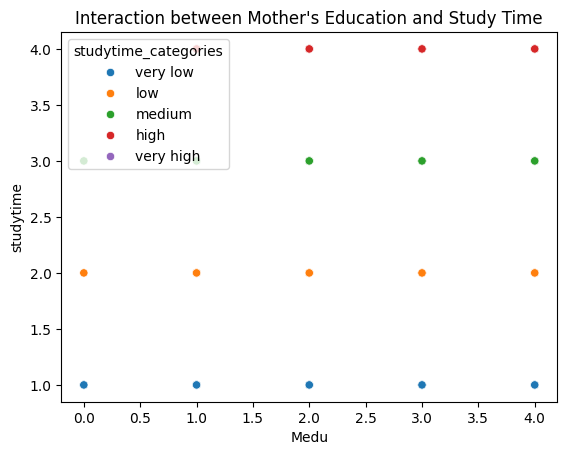

In [162]:
# 1. Create interaction features
df['medu_studytime'] = df['Medu'] * df['studytime']  # Interaction between Medu and studytime
df['failures_schoolsup'] = df['failures'] * df['schoolsup'].apply(lambda x: 1 if x == 'yes' else 0)  # Interaction between failures and schoolsup

# 2. Convert numerical features into categorical bins
bins = [0, 1, 2, 3, 4, 5]  # Defining bins for studytime
labels = ['very low', 'low', 'medium', 'high', 'very high']
df['studytime_categories'] = pd.cut(df['studytime'], bins=bins, labels=labels)

# Displaying the transformed DataFrame
print(df)

# Optional: Plot the distributions of categorical features (for visualization)
sns.countplot(x='studytime_categories', data=df)
plt.title('Study Time Categories')
plt.show()

# Additional: For visualizing interaction effects (Medu x studytime), you can use scatter plot
sns.scatterplot(x='Medu', y='studytime', hue='studytime_categories', data=df)
plt.title('Interaction between Mother\'s Education and Study Time')
plt.show()

## Feature Exploration

Visualize relationships between features and the target (G3):

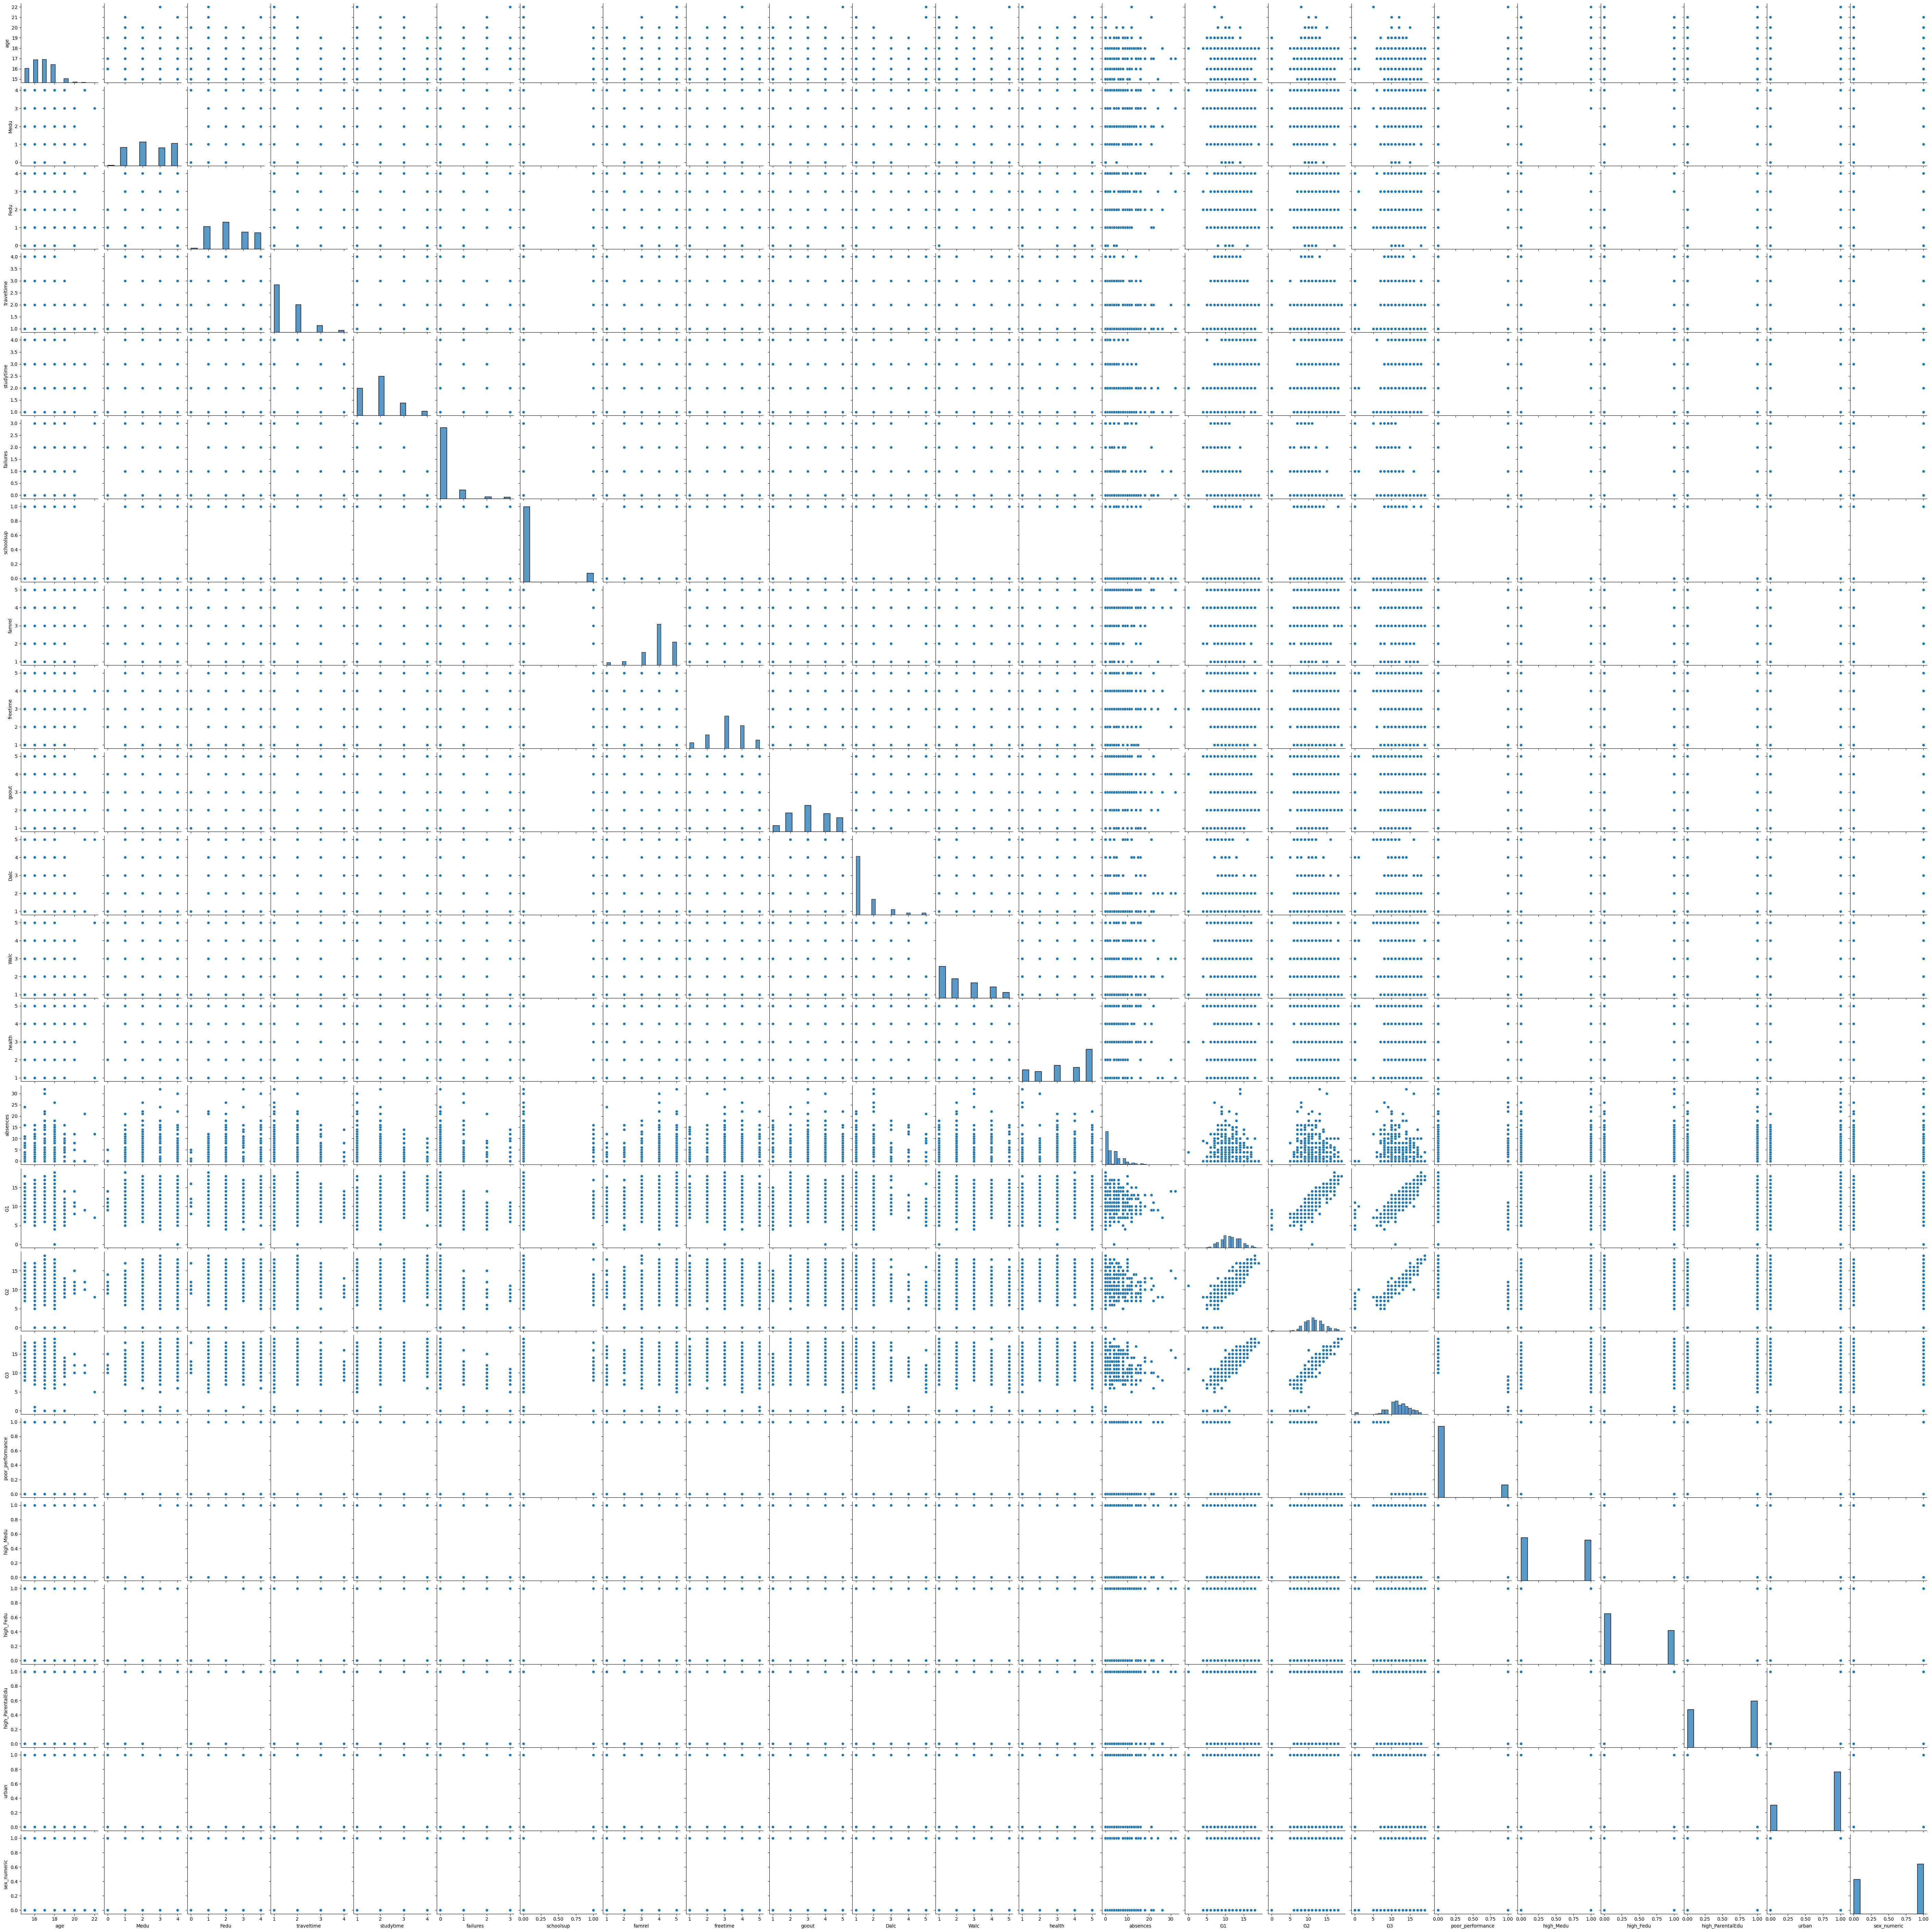

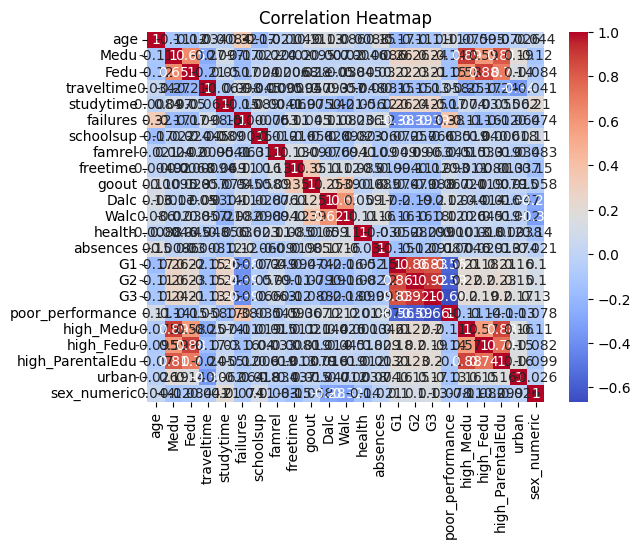

In [47]:
# Only include numeric columns for pairplot
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(df[numeric_columns])
plt.show()

# Correlation heatmap
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## For model training

Feature Selection Methods: Correlation Matrix, Chi-Square Test, PCA (Principal Component Analysis)

1. Correlation Matrix

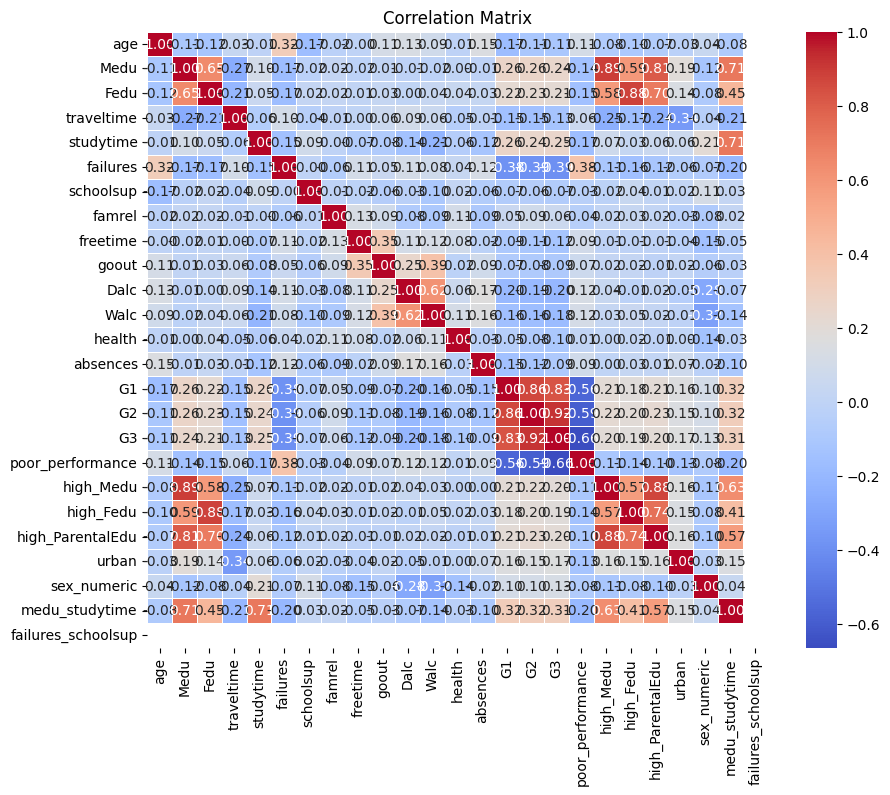

Highly correlated feature pairs:  [('G2', 'G3'), ('G3', 'G2')]


In [165]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Optional: Drop one of the features if correlation is high (e.g., > 0.9)
# Find pairs of highly correlated features
high_corr = corr_matrix[(corr_matrix > 0.9) & (corr_matrix != 1)].stack().index.tolist()
print("Highly correlated feature pairs: ", high_corr)


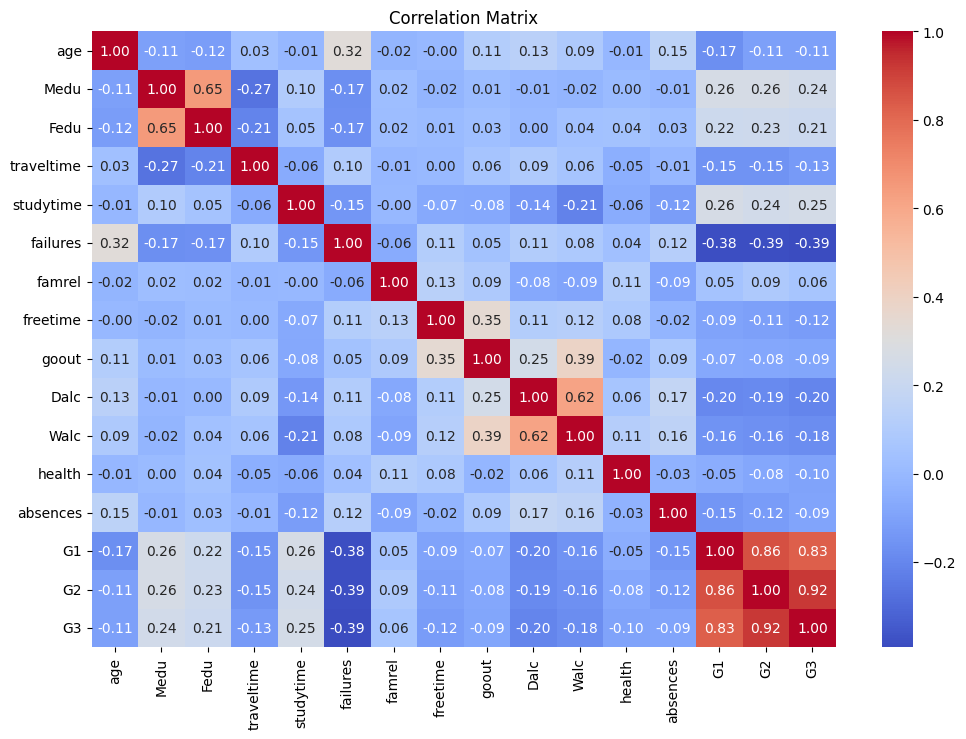

Correlation with G3:
 G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64


In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming it's in a DataFrame called df)
# df = pd.read_csv('your_dataset.csv')

# Select numerical features
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                      'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                      'absences', 'G1', 'G2', 'G3']

# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Correlation with target variable (G3)
corr_with_target = corr_matrix['G3'].sort_values(ascending=False)
print("Correlation with G3:\n", corr_with_target)

2. Chi-Square Test

In [169]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Select categorical features
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
                        'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                        'activities', 'nursery', 'higher', 'internet', 'romantic']

# Encode categorical features
label_encoder = LabelEncoder()
df_encoded = df[categorical_features].apply(label_encoder.fit_transform)

# Add target variable
df_encoded['G3'] = df['G3']

# Perform Chi-Square Test
chi_scores = chi2(df_encoded[categorical_features], df_encoded['G3'])

# Create a DataFrame to display results
chi_results = pd.DataFrame({
    'Feature': categorical_features,
    'Chi-Square Statistic': chi_scores[0],
    'p-value': chi_scores[1]
})

# Sort by Chi-Square Statistic
chi_results = chi_results.sort_values(by='Chi-Square Statistic', ascending=False)
print("Chi-Square Test Results:\n", chi_results)

Chi-Square Test Results:
        Feature  Chi-Square Statistic       p-value
0       school             60.035797  5.161553e-07
5         Mjob             34.888847  4.115821e-03
7       reason             33.617500  6.115200e-03
9    schoolsup             21.756390  1.512330e-01
11        paid             13.252095  6.542438e-01
1          sex             12.930063  6.778644e-01
14      higher             11.343756  7.877865e-01
12  activities             11.131398  8.013030e-01
2      address             11.106601  8.028580e-01
16    romantic             10.741687  8.251419e-01
3      famsize              8.130862  9.448747e-01
10      famsup              7.533753  9.615514e-01
6         Fjob              7.277847  9.675266e-01
8     guardian              6.306938  9.844278e-01
15    internet              5.694293  9.910742e-01
13     nursery              3.187132  9.997464e-01
4      Pstatus              0.487380  1.000000e+00


In [170]:
# Select categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Perform Chi-Square Test for each categorical feature
chi2_results = []
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['G3'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results.append((feature, chi2, p))

# Create a DataFrame to display Chi-Square results
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi-Square Statistic', 'p-value'])
chi2_df = chi2_df.sort_values(by='Chi-Square Statistic', ascending=False)
print("\nChi-Square Test Results:\n", chi2_df)



Chi-Square Test Results:
                  Feature  Chi-Square Statistic        p-value
16        Grade_Category           1298.000000  1.660318e-252
13                higher            106.697068   1.897542e-15
5                   Mjob             94.367927   8.076200e-03
17  studytime_categories             92.707102   1.143959e-04
0                 school             92.111660   1.019738e-12
7                 reason             87.036154   4.831586e-04
6                   Fjob             80.288999   8.213326e-02
2                address             36.589766   2.394404e-03
8               guardian             31.754730   4.789574e-01
14              internet             24.474147   7.964799e-02
1                    sex             21.910210   1.461145e-01
11            activities             21.629573   1.555599e-01
9                 famsup             19.479703   2.445735e-01
15              romantic             17.003305   3.853833e-01
12               nursery             16.159

3. Principal Component Analysis (PCA)

Explained Variance Ratio:
 [0.22907653 0.12173849 0.08948106 0.08262323 0.07109623]


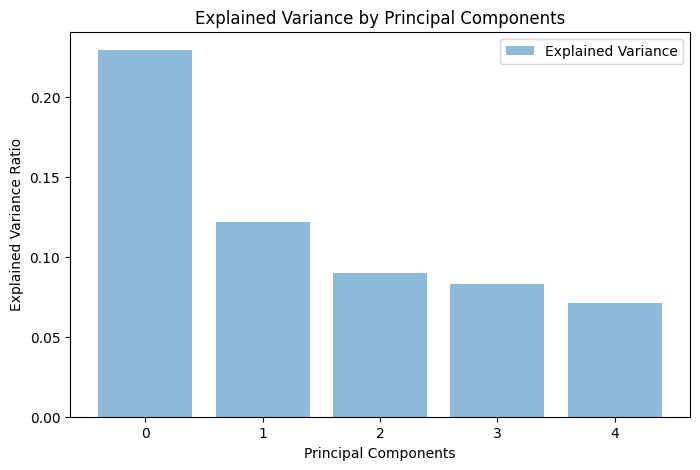

In [171]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features_for_pca = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 
                              'failures', 'famrel', 'freetime', 'goout', 'Dalc', 
                              'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features_for_pca])

# Apply PCA
pca = PCA(n_components=5)  # Adjust n_components as needed
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

## • Model Evaluation Parameters

2.Regression Metrics: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R² Score

In [182]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('student-por.csv')
# Use the last column as the label (change if needed)
label_column = data.columns[-1]
X = data.drop(label_column, axis=1)
y = data[label_column]

# Encode categorical features
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 1.59
Root Mean Squared Error (RMSE): 1.26
R² Score: 0.86
